In [257]:
import pandas as pd
from sklearn.datasets import load_iris

In [258]:
iris=load_iris()

In [259]:
dir(iris)
iris.feature_names
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [260]:
df=pd.DataFrame(iris.data)
df[0]=df[2]
df[1]=df[3]

In [261]:
df.drop([2,3],axis=1,inplace=True)
df

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


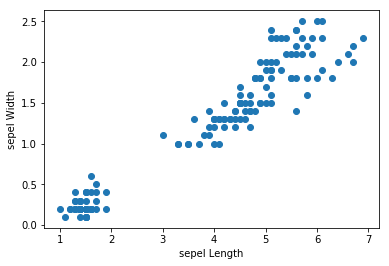

In [262]:
#Visualize
import matplotlib.pyplot as mt
mt.scatter(df[0],df[1])

mt.xlabel("sepel Length")
mt.ylabel("sepel Width")
mt.show()

In [263]:
#Apply Elgow Technique for geting K Value
k_rng=range(1,10)
sse=[]
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[[0,1]])
    sse.append(km.inertia_)
    
    

In [264]:
sse

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.49352336396547,
 13.933308757908758,
 11.073657664362926,
 9.26809082125604,
 7.686066305916306,
 6.6024367965367965]

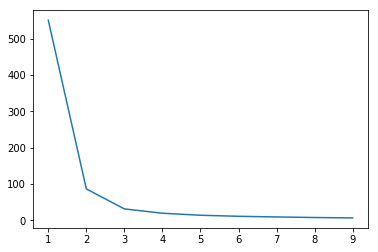

In [265]:
#To Find Elbow Method Result by Visualization
mt.plot(k_rng,sse)

In [266]:
#So K=3 by Elbow Method
km=KMeans(n_clusters=3)
y_Predict=km.fit_predict(df[[0,1]])



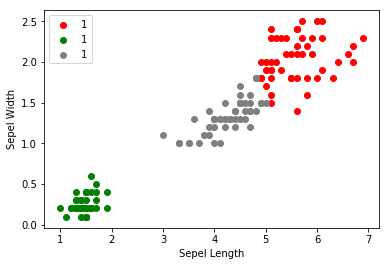

In [267]:
#To Visualize
df[2]=y_Predict
df0=df[df[2]==0]
df1=df[df[2]==1]
df2=df[df[2]==2]
mt.scatter(df0[0],df0[1],color="red")
mt.scatter(df1[0],df1[1],color="green")
mt.scatter(df2[0],df2[1],color="grey")
mt.xlabel("Sepel Length")
mt.ylabel("Sepel Width")
mt.legend()
mt.show()


In [268]:
#For Centrofiied Identification
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

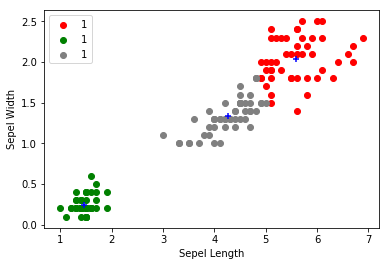

In [269]:
#Visualize the Centroid Points
df[2]=y_Predict
df0=df[df[2]==0]
df1=df[df[2]==1]
df2=df[df[2]==2]
mt.scatter(df0[0],df0[1],color="red")
mt.scatter(df1[0],df1[1],color="green")
mt.scatter(df2[0],df2[1],color="grey")
mt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="+",color="blue")
mt.xlabel("Sepel Length")
mt.ylabel("Sepel Width")
mt.legend()
mt.show()

In [270]:
km.predict([[5.1,3.5]])

array([0])

In [279]:
df[df[2]==0]

,0,1,2
77,5.0,1.7,0
83,5.1,1.6,0
100,6.0,2.5,0
101,5.1,1.9,0
102,5.9,2.1,0
103,5.6,1.8,0
104,5.8,2.2,0
105,6.6,2.1,0
107,6.3,1.8,0
108,5.8,1.8,0
